# Electricity Consumption Prediction

##### Import essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
electricity = pd.read_csv(r'C:\Users\user\OneDrive\Documents\electricity_cleaned.csv' , nrows=1000)
metadata = pd.read_csv(r'C:\Users\user\OneDrive\Documents\metadata.csv')
weather = pd.read_csv(r'C:\Users\user\OneDrive\Documents\weather.csv')

###### Converting Electricity Data to Long Format

In [3]:
electricity_long = electricity.melt(
    id_vars=['timestamp'],
    var_name='building_id',
    value_name='meter_reading'
)
electricity_long.head(3)

,timestamp,building_id,meter_reading
0,2016-01-01 00:00:00,Panther_parking_Lorriane,NaN
1,2016-01-01 01:00:00,Panther_parking_Lorriane,NaN
2,2016-01-01 02:00:00,Panther_parking_Lorriane,NaN


In [4]:
electricity_long['timestamp'] = pd.to_datetime(electricity_long['timestamp'])
weather['timestamp'] = pd.to_datetime(weather['timestamp'])

In [5]:
# Merge with Metadata
df = electricity_long.merge(metadata , on="building_id" , how="left")
# Merge Weather Data
df = df.merge(weather , on=["site_id" , "timestamp"] , how="left")

In [6]:
# Merged dataset shape
df.shape

(1578000, 42)

In [7]:
df.head()

,timestamp,building_id,meter_reading,site_id,building_id_kaggle,site_id_kaggle,primaryspaceusage,sub_primaryspaceusage,sqm,sqft,...,leed_level,rating,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed
0,2016-01-01 00:00:00,Panther_parking_Lorriane,NaN,Panther,73.0,0.0,Parking,Parking Garage,36012.7,387638.0,...,NaN,NaN,19.4,NaN,19.4,0.0,NaN,NaN,0.0,0.0
1,2016-01-01 01:00:00,Panther_parking_Lorriane,NaN,Panther,73.0,0.0,Parking,Parking Garage,36012.7,387638.0,...,NaN,NaN,21.1,6.0,21.1,-1.0,NaN,1019.4,0.0,0.0
2,2016-01-01 02:00:00,Panther_parking_Lorriane,NaN,Panther,73.0,0.0,Parking,Parking Garage,36012.7,387638.0,...,NaN,NaN,21.1,NaN,21.1,0.0,NaN,1018.8,210.0,1.5
3,2016-01-01 03:00:00,Panther_parking_Lorriane,NaN,Panther,73.0,0.0,Parking,Parking Garage,36012.7,387638.0,...,NaN,NaN,20.6,NaN,20.0,0.0,NaN,1018.1,0.0,0.0
4,2016-01-01 04:00:00,Panther_parking_Lorriane,NaN,Panther,73.0,0.0,Parking,Parking Garage,36012.7,387638.0,...,NaN,NaN,21.1,NaN,20.6,0.0,NaN,1019.0,290.0,1.5


In [8]:
df.describe()

,timestamp,meter_reading,building_id_kaggle,site_id_kaggle,sqm,sqft,lat,lng,yearbuilt,numberoffloors,occupants,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed
count,1578000,1.373463e+06,1.427000e+06,1.543000e+06,1.578000e+06,1.578000e+06,1.344000e+06,1.344000e+06,774000.000000,437000.000000,228000.000000,1.565960e+06,778927.000000,1.565696e+06,1.221569e+06,66315.000000,1.378430e+06,1.519371e+06,1.564664e+06
mean,2016-01-21 19:29:59.999999744,1.461510e+02,7.175837e+02,6.773169e+00,8.345467e+03,8.982989e+04,4.019814e+01,-7.346161e+01,1967.412145,3.631579,265.381579,5.203616e+00,2.263887,-9.643011e-01,5.959360e-01,13.839373,1.017131e+03,1.907950e+02,3.928412e+00
min,2016-01-01 00:00:00,2.000000e-04,0.000000e+00,0.000000e+00,2.630000e+01,2.830000e+02,2.851769e+01,-1.222607e+02,1900.000000,1.000000,0.000000,-2.560000e+01,0.000000,-2.940000e+01,-1.000000e+00,-1.000000,9.682000e+02,0.000000e+00,0.000000e+00
25%,2016-01-11 09:45:00,2.000285e+01,3.560000e+02,3.000000e+00,2.043900e+03,2.200000e+04,3.342443e+01,-9.774310e+01,1948.000000,1.000000,15.000000,-6.000000e-01,0.000000,-6.700000e+00,0.000000e+00,-1.000000,1.012100e+03,1.000000e+02,2.100000e+00
50%,2016-01-21 19:30:00,6.275000e+01,7.130000e+02,5.000000e+00,5.261350e+03,5.663300e+04,3.890350e+01,-7.700535e+01,1970.000000,2.000000,100.000000,6.000000e+00,0.000000,-6.000000e-01,0.000000e+00,0.000000,1.018400e+03,2.100000e+02,3.600000e+00
75%,2016-02-01 05:15:00,1.602500e+02,1.076000e+03,1.200000e+01,1.043140e+04,1.122830e+05,4.497878e+01,-7.648529e+01,1994.000000,5.000000,315.500000,1.100000e+01,4.000000,5.300000e+00,0.000000e+00,8.000000,1.022900e+03,2.900000e+02,5.700000e+00
max,2016-02-11 15:00:00,2.943100e+04,1.448000e+03,1.500000e+01,8.129010e+04,8.750000e+05,5.334980e+01,6.260300e+00,2017.000000,26.000000,2380.000000,3.000000e+01,9.000000,2.110000e+01,1.650000e+02,310.000000,1.042600e+03,3.600000e+02,1.900000e+01
std,NaN,2.498540e+02,4.174627e+02,4.877942e+00,1.009968e+04,1.087121e+05,7.313854e+00,3.741070e+01,30.955843,3.255587,401.851402,8.653039e+00,2.858482,8.821002e+00,5.000813e+00,37.452136,9.114874e+00,1.154329e+02,2.736611e+00


### Data Cleaning

In [9]:
# Removing negative meter readings
df = df[df['meter_reading'] >= 0]

# Checking for missing percentage
missing = df.isnull().mean().sort_values(ascending=False)

# Drop columns with >50% missing values
drop_cols = missing[missing > 0.50].index
df.drop(columns=drop_cols, inplace=True)

# Fill remaining missing values
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

# Final shape
df.shape

C:\Users\user\AppData\Local\Temp\ipykernel_18900\860528780.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_18900\860528780.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


(1373463, 20)

### FEATURE ENGINEERING

In [10]:
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.weekday

df.drop(columns=['timestamp'], inplace=True)

df.head()

,building_id,meter_reading,site_id,building_id_kaggle,site_id_kaggle,primaryspaceusage,sub_primaryspaceusage,sqm,sqft,lat,...,airTemperature,dewTemperature,precipDepth1HR,seaLvlPressure,windDirection,windSpeed,hour,day,month,weekday
747,Panther_parking_Lorriane,3.7207,Panther,73.0,0.0,Parking,Parking Garage,36012.7,387638.0,28.517689,...,17.2,15.0,0.0,1017.1,0.0,0.0,3,1,2,0
877,Panther_parking_Lorriane,2.1004,Panther,73.0,0.0,Parking,Parking Garage,36012.7,387638.0,28.517689,...,17.8,12.8,-1.0,1020.5,20.0,4.1,13,6,2,5
1043,Panther_lodging_Cora,20.5540,Panther,97.0,0.0,Lodging/residential,Residence Hall,17433.0,187647.0,28.517689,...,17.8,13.9,0.0,1018.2,10.0,5.1,19,2,1,5
1199,Panther_lodging_Cora,19.5038,Panther,97.0,0.0,Lodging/residential,Residence Hall,17433.0,187647.0,28.517689,...,15.0,15.0,0.0,1012.6,340.0,3.1,7,9,1,5
1205,Panther_lodging_Cora,13.6026,Panther,97.0,0.0,Lodging/residential,Residence Hall,17433.0,187647.0,28.517689,...,20.0,17.2,0.0,1011.4,190.0,3.1,13,9,1,5


In [11]:
df.shape

(1373463, 23)

### EXPLORATORY DATA ANALYSIS

#### Target Distribution

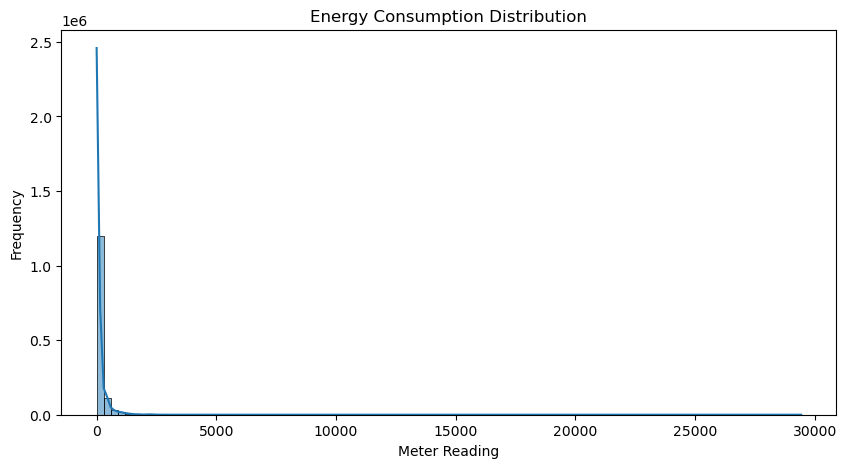

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df['meter_reading'], bins=100, kde=True)
plt.title("Energy Consumption Distribution")
plt.xlabel("Meter Reading")
plt.ylabel("Frequency")
plt.show()

#### Key Findings:
##### 1. Highly Right-Skewed Distribution
###### -> The meter reading values show a strongly right-skewed distribution, indicating that most energy consumption values are   concentrated at lower ranges, while a small number of observations have very high values
##### 2. Majority of Readings are Low
###### -> Most buildings operate at low to moderate energy levels for the majority of the time, which is reflected by the dense cluster of values near zero
##### 3. Potential Need for Data Transformation
###### -> The heavy skewness indicates that applying transformations such as logarithmic scaling could improve machine learning model stability and performance

#### Hourly Pattern

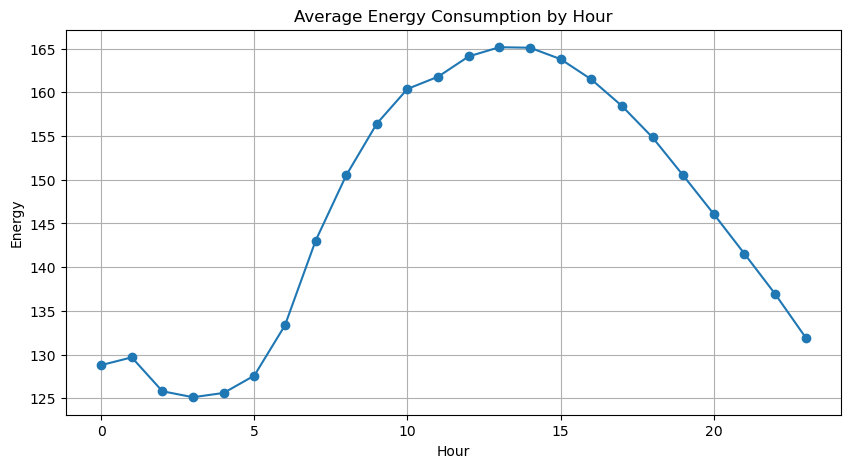

In [13]:
hourly_avg = df.groupby('hour')['meter_reading'].mean()
plt.figure(figsize=(10,5))
hourly_avg.plot(marker='o')
plt.title("Average Energy Consumption by Hour")
plt.xlabel("Hour")
plt.ylabel("Energy")
plt.grid()
plt.show()

#### Key Findings
##### 1. Lowest Energy Consumption During Late Night & Early Morning
###### -> Energy usage is at its minimum during early morning hours, indicating reduced building activity, occupancy, and equipment operation
##### 2. Sharp Increase After 6 AM
###### -> A rapid rise in consumption begins after 6 AM, reflecting the start of daily operations, HVAC systems, lighting, and equipment usage
##### 3. Peak Energy Usage During Midday
###### -> The highest energy demand occurs between 12 PM and 3 PM, corresponding to peak occupancy, operational activities, and maximum cooling/heating load

#### Monthly Pattern

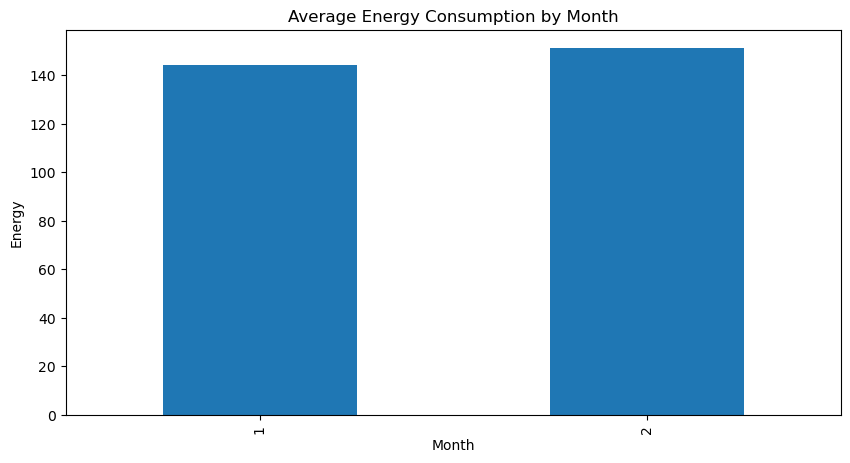

In [14]:
monthly_avg = df.groupby('month')['meter_reading'].mean()
plt.figure(figsize=(10,5))
monthly_avg.plot(kind='bar')
plt.title("Average Energy Consumption by Month")
plt.xlabel("Month")
plt.ylabel("Energy")
plt.show()

#### Key Findings:
##### -> The average energy consumption in Month 2 is higher than in Month 1
##### -> Month 1 shows an average energy usage of approximately 145 units, while Month 2 shows around 150+ units
##### -> The trend suggests energy consumption varies with time and seasonality

#### Weather Impact


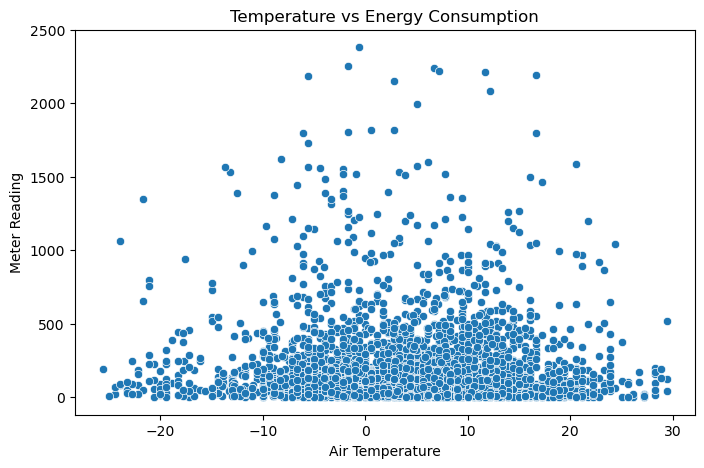

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='airTemperature' , y='meter_reading' , data=df.sample(5000))
plt.title("Temperature vs Energy Consumption")
plt.xlabel("Air Temperature")
plt.ylabel("Meter Reading")
plt.show()

#### Key Findings:
##### 1. Positive Correlation at High Temperatures
###### -> Energy consumption tends to increase as air temperature rises, indicating increased cooling demand
##### 2. Higher Variability at Extreme Temperatures
###### -> Greater dispersion in energy usage is observed at higher temperatures, reflecting different building responses to heat

### MACHINE LEARNING MODEL

In [12]:
# Separate features and target
X = df.drop('meter_reading', axis=1)
y = df['meter_reading']

# Identify categorical columns
cat_cols = X.select_dtypes(include=['object']).columns

# Drop high-cardinality column
X.drop(['sub_primaryspaceusage'], axis=1, inplace=True)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cat_cols:
    if col in X.columns:
        X[col] = le.fit_transform(X[col])


##### Train_Test_Split

In [14]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)
X_train.shape

(1098770, 21)

In [15]:
X_test.shape

(274693, 21)

##### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Training ML Model

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
y_pred = model.predict(X_test)

##### Evaluate Model Performance

In [32]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
import numpy as np
mae = mean_absolute_error(y_test , y_pred)
rmse = np.sqrt(mean_squared_error(y_test , y_pred))
r2_lr = r2_score(y_test , y_pred)
print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2_lr)

MAE: 92.84151693688051
RMSE: 178.01139572682473
R² Score: 0.48798749775655526


### XGBOOST MODEL

##### Final Feature Selection

In [22]:
target = "meter_reading"

drop_cols = [
    "building_id",
    "timestamp",
    "meter_reading",
    "building_id_kaggle",
    "site_id_kaggle"
]

X = df.drop(columns=drop_cols, errors="ignore")
y = df[target]

In [23]:
from sklearn.preprocessing import LabelEncoder
cat_cols = X.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col].astype(str))

In [24]:
for col in X.columns:
    if X[col].dtype == "float64":
        X[col] = X[col].astype("float32")
    elif X[col].dtype == "int64":
        X[col] = X[col].astype("int32")

y = y.astype("float32")

##### Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

##### XGBoost Model

In [27]:
from xgboost import XGBRegressor
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8, 
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist",   
    n_jobs=-1,
    random_state=42
)   

##### Model Training

In [29]:
xgb.fit(X_train , y_train)
y_pred_xgb = xgb.predict(X_test)

##### Model Evaluation

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("XGBoost Model Performance:\n")

print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R² Score:", r2_score(y_test, y_pred_xgb))

XGBoost Model Performance:

MAE: 25.115079879760742
RMSE: 53.446997511261095
R² Score: 0.9538436532020569


### Comparison of ML Models

In [33]:
print("\nModel Comparison")
print(f"Linear Regression R² : {r2_lr:.4f}")
print(f"XGBoost R²           : {r2_score(y_test, y_pred_xgb):.4f}")



Model Comparison
Linear Regression R² : 0.4880
XGBoost R²           : 0.9538


### Project Conclusion

##### In this project, I analyzed the Building Data Genome Project 2 dataset to study building energy consumption patterns and develop an accurate prediction model. The work included data loading, merging multiple datasets, data cleaning, exploratory data analysis, and feature engineering. Visual analysis helped identify important relationships between energy usage, weather conditions, and time-based features
##### A baseline Linear Regression model was built for comparison, followed by an advanced XGBoost regression model, which achieved excellent performance with an R² score of 0.95. The results demonstrate the effectiveness of machine learning in predicting building energy consumption and provided valuable hands-on experience in end-to-end data science and machine learning workflows
